In [13]:
from kadi import events
import matplotlib.pyplot as plt
%matplotlib inline
from Ska.engarchive import fetch_sci as fetch

In [4]:
manvrs = events.manvrs.filter('2014:241').table

In [9]:
ok = manvrs['one_shot'] > 0
manvrs = manvrs[ok]

In [15]:
tccd = fetch.Msid('aacccdpt', manvrs['tstart'][0], manvrs['tstop'][-1], stat='5min')

In [22]:
endtimes = manvrs['tstop'] - 100
idxs = np.searchsorted(tccd.times, endtimes)
manvrs['tccd'] = tccd.vals[idxs]

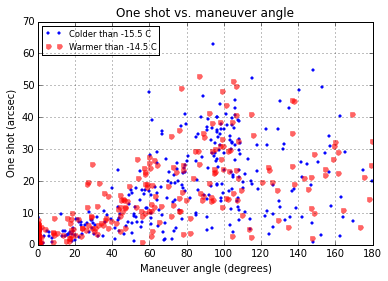

In [46]:
for color, tlow, thi, ms, alpha, label in (('b', -20, -15.5, 5, 1.0, 'Colder than -15.5 C'), 
                                        ('r', -14.5, 0, 10, 0.6, 'Warmer than -14.5 C')):
    ok = (manvrs['tccd'] > tlow) & (manvrs['tccd'] <= thi)
    plt.plot(manvrs['angle'][ok], manvrs['one_shot'][ok], '.', color=color, ms=ms, alpha=alpha, label=label)
plt.grid();
plt.title('One shot vs. maneuver angle')
plt.xlabel('Maneuver angle (degrees)')
plt.ylabel('One shot (arcsec)')
plt.ylim(0, 70)
plt.legend(loc='upper left', fontsize='small')
plt.savefig('one_shots_by_ccd_temp.png')

(25.516903494751972, -16.196812, 115)
(24.549650903848502, -14.103583, 65)


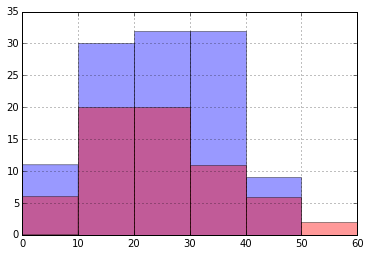

In [39]:
for color, tlow, thi in (('b', -20, -15.5), ('r', -14.5, 0)):
    ok = (manvrs['tccd'] > tlow) & (manvrs['tccd'] <= thi) & (np.abs(manvrs['angle'] - 90) < 20)
    plt.hist(manvrs['one_shot'][ok], facecolor=color, bins=np.arange(0, 70, 10), alpha=0.4)
    print(np.mean(manvrs['one_shot'][ok]), np.mean(manvrs['tccd'][ok]), np.count_nonzero(ok))
plt.grid();

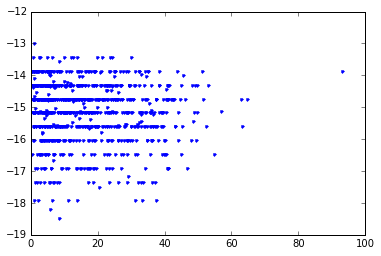

In [18]:
plt.plot(manvrs['one_shot'], manvrs['tccd'], '.')

In [29]:
ok = manvrs['one_shot'] > 80
manvrs[ok]

start,stop,tstart,tstop,dur,prev_manvr_stop,manvr_start,manvr_stop,next_manvr_start,n_dwell,n_acq,n_guide,n_kalman,anomalous,template,start_ra,start_dec,start_roll,stop_ra,stop_dec,stop_roll,angle,one_shot,tccd
string168,string168,float64,float64,float64,string168,string168,string168,string168,int64,int64,int64,int64,bool,string96,float64,float64,float64,float64,float64,float64,float64,float64,float32
2015:017:03:25:08.121,2015:017:04:15:56.471,537852375.305,537855423.655,3048.35017014,2015:017:02:47:21.333,2015:017:03:25:08.633,2015:017:04:15:56.983,2015:017:07:40:24.184,1,1,1,1,False,normal,319.299999999,-67.0999999997,206.520437523,288.999999999,26.0,12.0615105821,179.143694919,92.9984436035,-13.857


In [30]:
m = events.manvrs.filter(start='2015:017:03:25:08.121')

In [34]:
m[0].get_obsid()

52161